# Лабораторная работа №1: Основы цифровой обработки сигналов

Выполнил студент группы 9382 Савельев И.С. Вариант 15


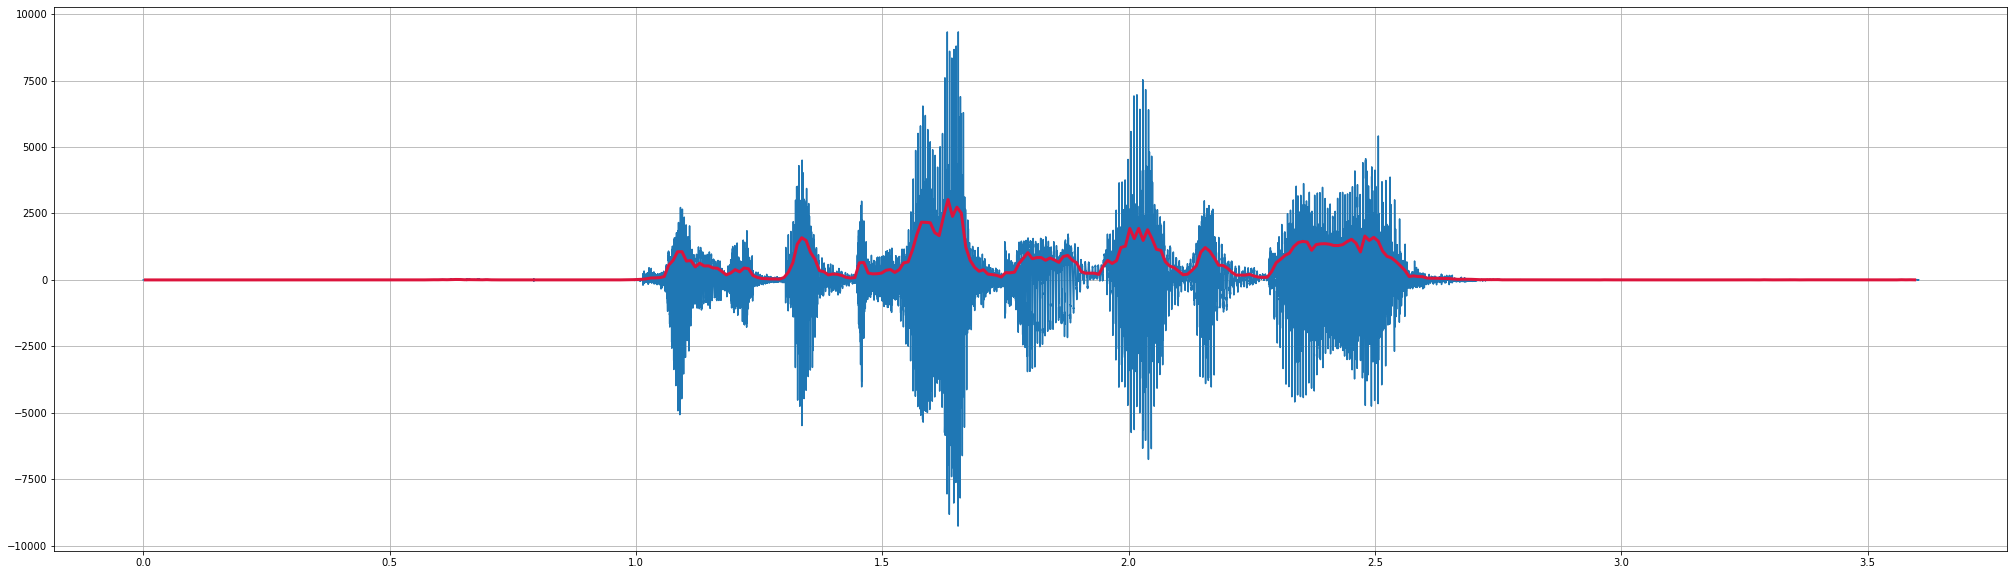

In [10]:
# Построение огибающей

import wavio  
import matplotlib.pyplot as plt
import numpy as np


# wav хранит общее число фреймов, число каналов, число байт на сэмпл, число фреймов в секунду, numpy.ndarray
wav = wavio.read('/home/indiora/MathPack/03-01-05-01-01-02-15_A15.wav')                                       

# Параметры waw записи
x = np.arange(wav.data.shape[0])/wav.rate
y = wav.data[:,0]   

# Параметры огибающей
a = []
b = []
n = 400

for j in range(n):
    summ_y = 0
    summ_x = 0
    for k in range(round(172973 / n)*j, round(172973 / n)*j + round(172973 / n)):
        summ_y += abs(wav.data[k][0])
        summ_x += x[k]
    a.append(summ_x / round(172973 / n))
    b.append(summ_y / round(172973 / n))
    
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(a, b,linestyle = '-', linewidth = 3, color = 'crimson')
ax.grid()

# размер картинки
fig.set_figwidth(35)
fig.set_figheight(10)

plt.show()



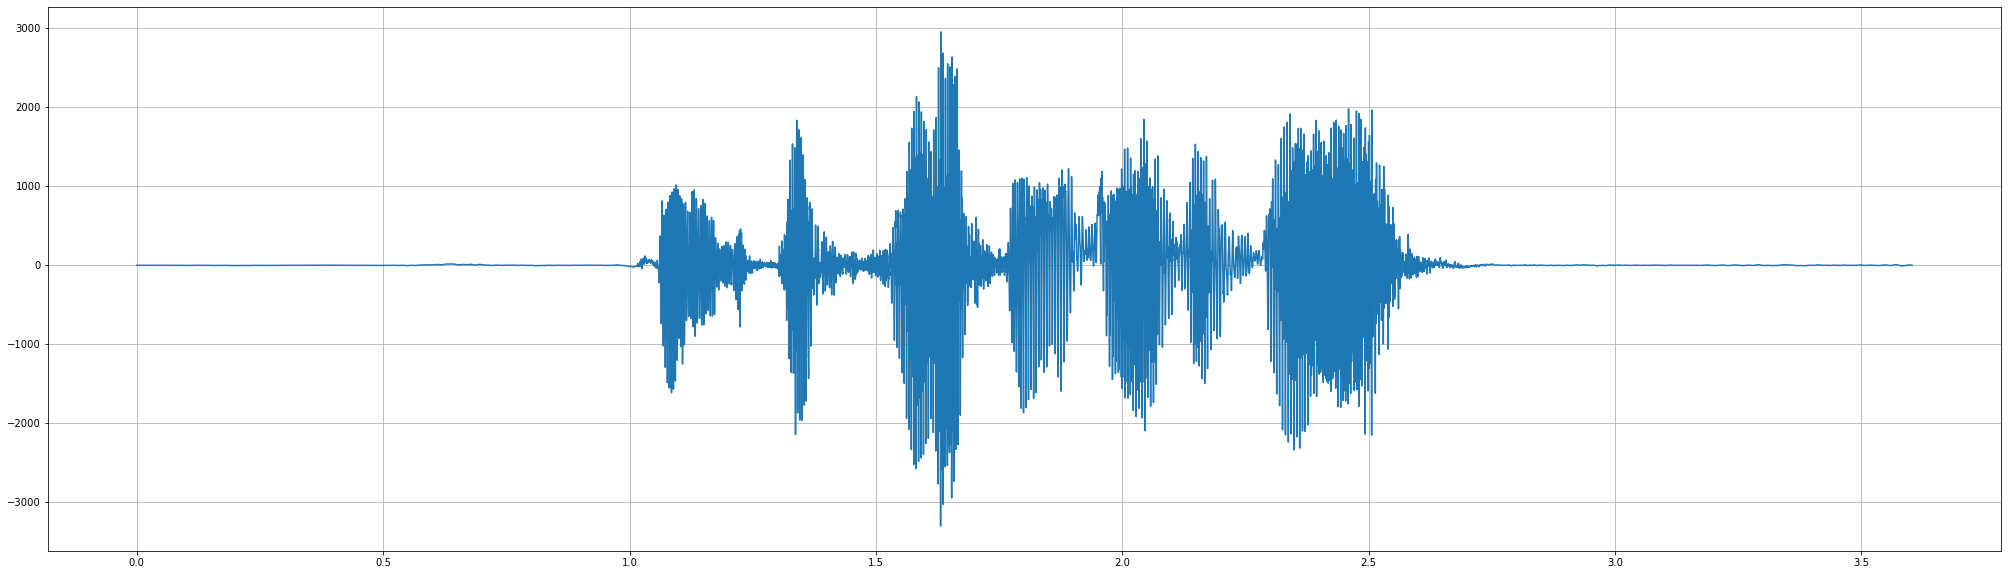

In [11]:
# Применения ФНЧ фильтра

import wavio  
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# wav хранит общее число фреймов, число каналов, число байт на сэмпл, число фреймов в секунду, numpy.ndarray
wav = wavio.read('/home/indiora/MathPack/03-01-05-01-01-02-15_A15.wav')                                       

wn = 2 * 600 / wav.rate
m = 1

# Применяем фильтр
b, a = signal.butter(m, wn, 'lowpass')
filtedData = signal.filtfilt(b, a, wav.data[:,0])

# Записываем результат
wavio.write("/home/indiora/MathPack/lowpass.wav", filtedData, wav.rate, sampwidth=wav.sampwidth)


fig, ax = plt.subplots()
ax.plot(np.arange(wav.data.shape[0])/wav.rate, filtedData)
ax.grid()

# размер картинки
fig.set_figwidth(35)
fig.set_figheight(10)

plt.show()

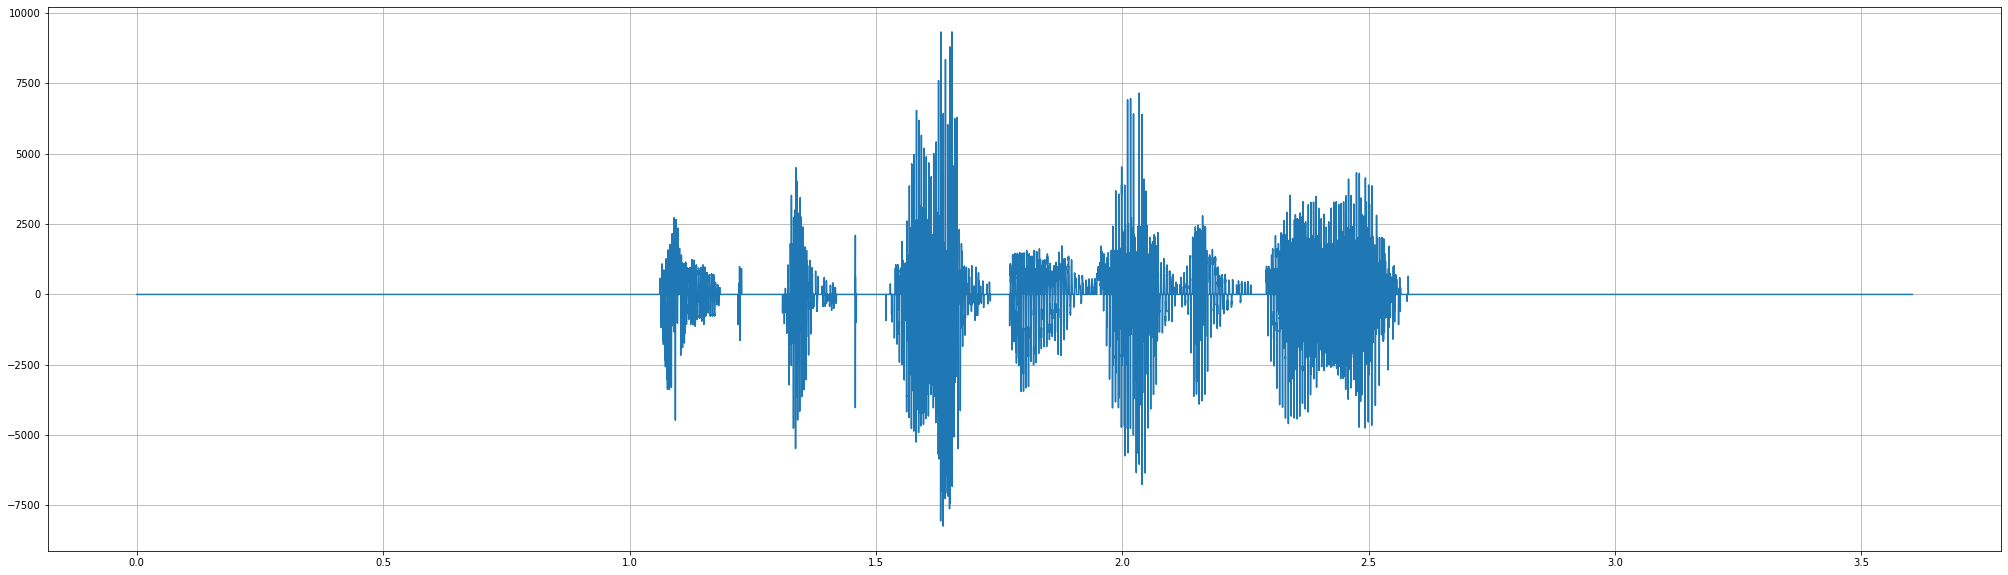

In [17]:
# Детектор сигнал/шум

import wavio  
import numpy as np
import scipy
from scipy import signal
from scipy.io.wavfile import write


# wav хранит общее число фреймов, число каналов, число байт на сэмпл, число фреймов в секунду, numpy.ndarray
wav = wavio.read('/home/indiora/MathPack/03-01-05-01-01-02-15_A15.wav')   

summ = 0
a = 0.6

for k in range(0, wav.data.shape[0]):
    summ += abs(wav.data[k][0])
    
mid = summ / wav.data.shape[0] 

# Порог детектора
th = mid * a

# Величина "провала"
k = 20

m_copy = np.zeros(len(wav.data))

sig_counter = 0
no_sig_counter = 0

for i in range(len(wav.data)):
    if abs(wav.data[i][0]) > th:
        counter_signal += 1
        if counter_signal >= k:
            m_copy[i] = wav.data[i][0]
    else:
        counter_signal = 0
    
# Отрисовываем график
fig, ax = plt.subplots()
ax.plot(np.arange(wav.data.shape[0])/wav.rate, m_copy)
ax.grid()
fig.set_figwidth(35)
fig.set_figheight(10)
plt.show()

        


In [18]:
# Эхо

import wavio  
import numpy as np
import scipy
from scipy import signal


# wav хранит общее число фреймов, число каналов, число байт на сэмпл, число фреймов в секунду, numpy.ndarray
wav = wavio.read('/home/indiora/MathPack/03-01-05-01-01-02-15_A15.wav')  

# D_1
dellay = 0.07
gamma = 0.9;

# массив D_i
delay_arr = [int(wav.rate * dellay * 2 ** ((1-i)/8)) for i in range(1, 9)]

# массив alpha_i
alpha_arr = [0.9]
for i in range(7):
    alpha_arr.append(alpha_arr[i] / 2)

output_audio = np.zeros(len(wav.data))


for count, e in enumerate(wav.data):
    output_audio[count] = e + gamma * (alpha_arr[0] * wav.data[count - delay_arr[0]] \
    + alpha_arr[1] * wav.data[count - delay_arr[1] - delay_arr[0]] \
    + alpha_arr[2] * wav.data[count - delay_arr[1] - delay_arr[0] - delay_arr[2]] \
    + alpha_arr[3] * wav.data[count - delay_arr[1] - delay_arr[0] - delay_arr[2] - delay_arr[3]] \
    + alpha_arr[4] * wav.data[count - delay_arr[1] - delay_arr[0] - delay_arr[2] - delay_arr[3] - delay_arr[4]] \
    + alpha_arr[5] * wav.data[count - delay_arr[1] - delay_arr[0] - delay_arr[2] - delay_arr[3] - delay_arr[4] - delay_arr[5]] \
    + alpha_arr[6] * wav.data[count - delay_arr[1] - delay_arr[0] - delay_arr[2] - delay_arr[3] - delay_arr[4] - delay_arr[5] - delay_arr[6]] \
    + alpha_arr[7] * wav.data[count - delay_arr[1] - delay_arr[0] - delay_arr[2] - delay_arr[3] - delay_arr[4] - delay_arr[5] - delay_arr[6] - delay_arr[7]])

# Применяем  ФНЧ фильтр 1 порядка
wn = 2 * 600 / wav.rate
m = 1

b, a = signal.butter(m, wn, 'lowpass')
filtedData = signal.filtfilt(b, a, output_audio) 


wavio.write("/home/indiora/MathPack/echo.wav", filtedData, wav.rate, sampwidth=wav.sampwidth) 



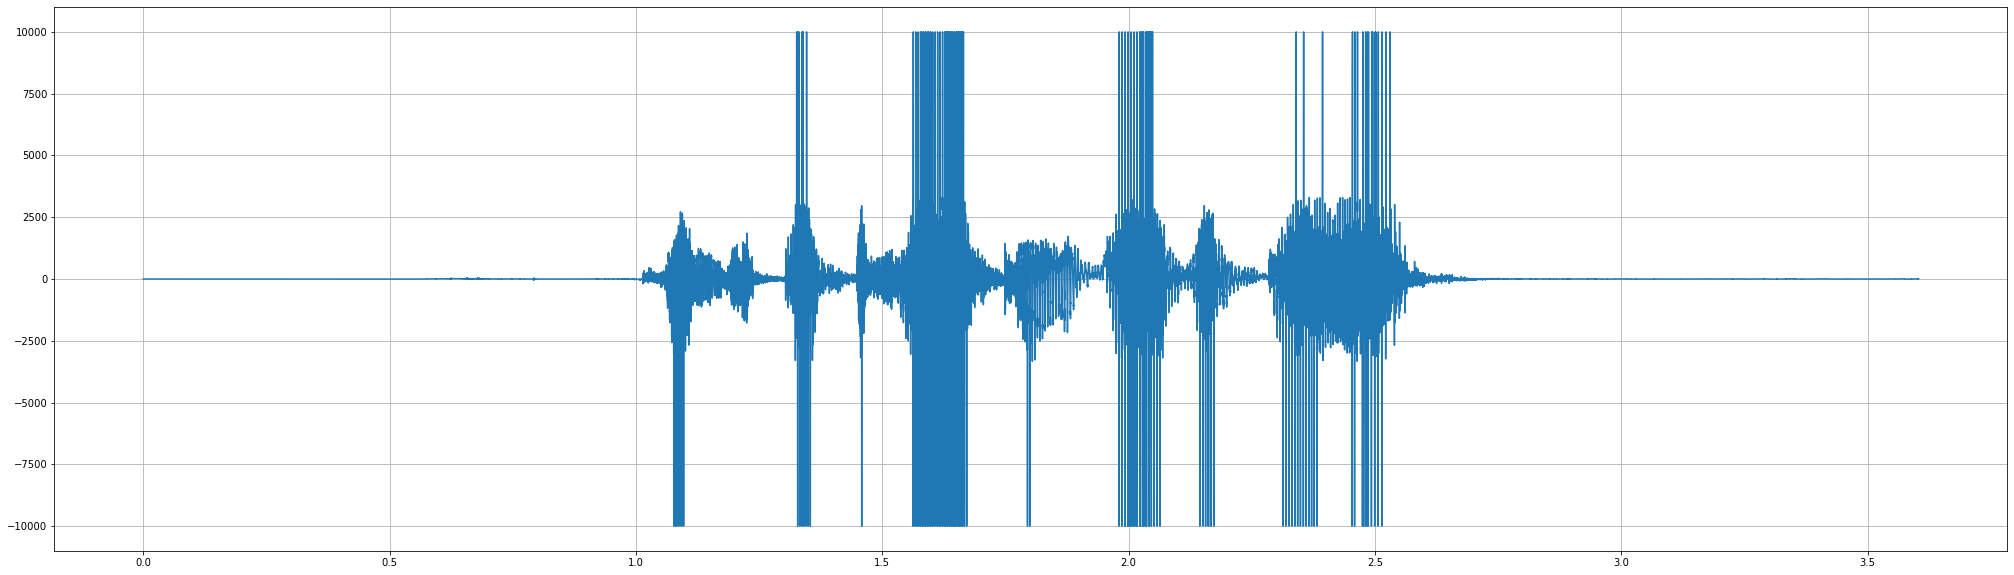

In [20]:
# Distortion

import wavio  
import numpy as np
import scipy
from scipy.io.wavfile import write

def sign(value):
    if value < 0:
        return -1
    elif value > 0:
        return 1
    return 0 

# wav хранит общее число фреймов, число каналов, число байт на сэмпл, число фреймов в секунду, numpy.ndarray
wav = wavio.read('/home/indiora/MathPack/03-01-05-01-01-02-15_A15.wav') 

summ = 0

for k in range(0, wav.data.shape[0]):
    summ += abs(wav.data[k][0])
    
mid = summ / wav.data.shape[0] 


# Значение порога
th = int(10 * mid)

# Значение макса
maxx = int(30 * mid)

output_audio = np.zeros(len(wav.data))

for i in range(wav.data.shape[0]):
    if(abs(wav.data[i]) <= th):
        output_audio[i] = wav.data[i]
    else:
        output_audio[i] = maxx * sign(wav.data[i])
        
        
wavio.write("/home/indiora/MathPack/distortion.wav", output_audio, wav.rate, sampwidth=wav.sampwidth) 

# Отрисовываем график
fig, ax = plt.subplots()
ax.plot(np.arange(wav.data.shape[0])/wav.rate, output_audio)
ax.grid()
fig.set_figwidth(35)
fig.set_figheight(10)
plt.show()


# Вывод

В результате выполнения лабораторной работы были изучены основы работы с Jupyter Notebook и библиотеками Python, такими как  wavio, numpy, scipy и matplotlib.